In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [69]:
data = pd.read_csv('data_banknote_authentication.csv', names=['Variance','Skewness','Kurtosis', 'Entropy of image','class'])

In [16]:
data #1 = fake, 0=real

,Variance,Skewness,Kurtosis,Entropy of image,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [72]:
try_x = normalize(data.iloc[:, 0:4], norm='l2', axis=0)

In [122]:
try_x

array([[ 0.03401265,  0.03789594, -0.0167326 , -0.00499742],
       [ 0.04269332,  0.03571518, -0.01465421, -0.01634652],
       [ 0.03630796, -0.01153701,  0.01146898,  0.00119013],
       ...,
       [-0.03522135, -0.05885304,  0.10486233, -0.03104844],
       [-0.03346888, -0.03665667,  0.07386711, -0.01433633],
       [-0.02387253, -0.00287754,  0.01599888,  0.01336254]])

In [18]:
data.isna().sum()

Variance            0
Skewness            0
Kurtosis            0
Entropy of image    0
class               0
dtype: int64

In [20]:
#defining features and target into X and y respectively
X = data.iloc[:, 0:4]
y = data.iloc[:, 4]

Counter({0: 762, 1: 610})

Population per class:     0
0  762
1  610
Proportion Chance Criterion: 50.61%
1.25 * Proportion Chance Criterion: 63.27%


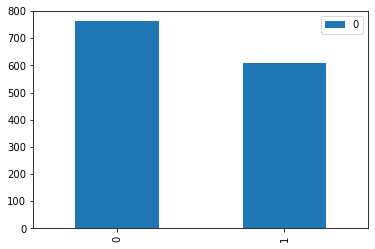

In [22]:
from collections import Counter
state_counts = Counter(y)
display(state_counts)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [73]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,31,1):
    
    X_train, X_test, y_train, y_test = train_test_split(try_x,y, 
                                                        test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 70) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

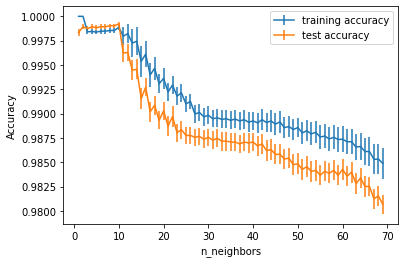

In [74]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [147]:
optimal_k = lahat_test.mean(axis=1).idxmax()
test_optimal = lahat_test.mean(axis=1)[optimal_k]

print(f'optimal neighbor k = {optimal_k+1}\ntest score = {test_optimal}')

optimal neighbor k = 10
test score = 0.9992225461613219


In [148]:
### choosing different k ranging from 2-10
k=10
training_accuracy = []
test_accuracy = []

for seed in range(1,31):
    X_train, X_test, y_train, y_test = train_test_split(try_x, y,test_size=0.25, random_state=seed)
    
    clf = KNeighborsClassifier(n_neighbors=k)  # build the model
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(clf.score(X_test, y_test))
train_mean = np.array(training_accuracy).mean()
test_mean = np.array(test_accuracy).mean()


print(f'k = {k}')    
print(f'Training score avg: {train_mean}')
print(f'Test score avg: {test_mean}')

k = 10
Training score avg: 0.9988662131519275
Test score avg: 0.9992225461613218
